In [2]:
# TEAM INFERNO GOOGLE PLAYSTORE APPLICATION DATA-ANALYTICS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Google-Playstore.csv")

In [6]:
data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [7]:
print(f'Data contains {data.shape[0]} samples and {data.shape[1]} variables')

Data contains 2312944 samples and 24 variables


In [8]:
TARGET_COL = 'y'
features = [c for c in data.columns if c not in [TARGET_COL]]
print(f'\n The dataset contains {len(features)} input features')


 The dataset contains 24 input features


In [9]:
%matplotlib inline

In [10]:
data[features].isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [11]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(2312944, 24)
(2312944, 24)


In [12]:
data.nunique()

App Name             2177944
App Id               2312944
Category                  48
Rating                    42
Rating Count           38482
Installs                  22
Minimum Installs          22
Maximum Installs      251563
Free                       2
Price                   1063
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67374
dtype: int64

In [13]:
data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [14]:
cat_cols = ['App Id','Minimum Installs', 'Maximum Installs', 'Price', 'Currency','Size', 'Developer Id', 'Developer Website',
            'Developer Email', 'Released', 'Last Updated','Privacy Policy', 'Ad Supported', 'In App Purchases','Scraped Time']

In [15]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['App Name',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Free',
 'Minimum Android',
 'Content Rating',
 'Editors Choice']

In [ ]:
fig, axes = plt.subplots(5, 2) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[num_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

In [8]:
data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Rating Count'}>],
       [<AxesSubplot:title={'center':'Installs'}>,
        <AxesSubplot:title={'center':'Minimum Installs'}>],
       [<AxesSubplot:title={'center':'Maximum Installs'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

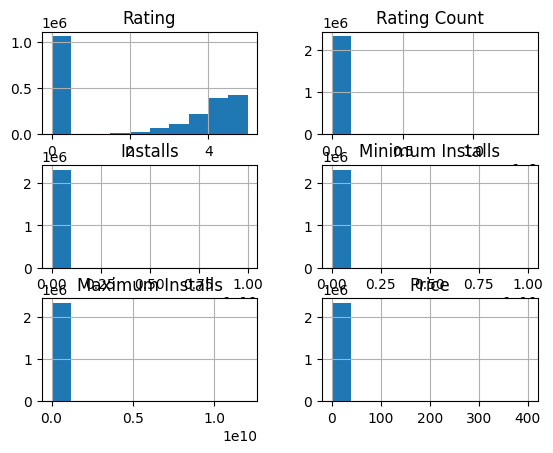

In [32]:
data.hist()

<AxesSubplot:>

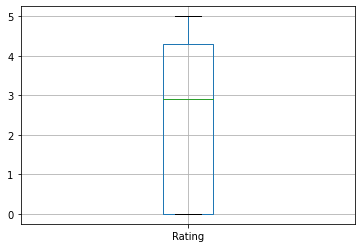

In [4]:
data.boxplot('Rating')

In [7]:
#fill the null values with appropiate value using aggregate function such as mean median or mode.
#Define a function impute median
def impute_median(series):
    return series.fillna(series .median())

In [8]:
data.Rating = data['Rating'].transform(impute_median)

In [9]:
#count the number of null values in each column 
data .isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                    0
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [10]:
#mode of categorial values
print(data['App Name'].mode())
print(data['Rating Count'].mode())
print(data['Installs'].mode())

print(data['Minimum Installs'].mode())
print(data['Currency'].mode())
print(data['Size'].mode())

print(data['Minimum Android'].mode())
print(data['Developer Id'].mode())
print(data['Developer Website'].mode())

print(data['Developer Email'].mode())
print(data['Released'].mode())
print(data['Privacy Policy'].mode())

0    Tic Tac Toe
Name: App Name, dtype: object
0    0.0
Name: Rating Count, dtype: float64
0    100+
Name: Installs, dtype: object
0    100.0
Name: Minimum Installs, dtype: float64
0    USD
Name: Currency, dtype: object
0    Varies with device
Name: Size, dtype: object
0    4.1 and up
Name: Minimum Android, dtype: object
0    Subsplash Inc
Name: Developer Id, dtype: object
0    http://www.subsplash.com/
Name: Developer Website, dtype: object
0    support@classplus.co
Name: Developer Email, dtype: object
0    Jun 16, 2020
Name: Released, dtype: object
0    http://www.subsplash.com/legal/privacy
Name: Privacy Policy, dtype: object


In [19]:
#fill the missing categorial values with modes
data['App Name'].fillna(str(data['App Name'].mode().values[0]),inplace=True)
data['Installs'].fillna(str(data['Installs'].mode().values[0]),inplace=True)
data['Currency'].fillna(str(data['Currency'].mode().values[0]),inplace=True)

data['Size'].fillna(str(data['Size'].mode().values[0]),inplace=True)
data['Minimum Android'].fillna(str(data['Minimum Android'].mode().values[0]),inplace=True)
data['Developer Id'].fillna(str(data['Developer Id'].mode().values[0]),inplace=True)

data['Developer Website'].fillna(str(data['Developer Website'].mode().values[0]),inplace=True)
data['Developer Email'].fillna(str(data['Developer Email'].mode().values[0]),inplace=True)
data['Released'].fillna(str(data['Released'].mode().values[0]),inplace=True)
data['Privacy Policy'].fillna(str(data['Privacy Policy'].mode().values[0]),inplace=True)


In [20]:
data.isnull().sum()

App Name                 0
App Id                   0
Category                 0
Rating                   0
Rating Count         22883
Installs                 0
Minimum Installs       107
Maximum Installs         0
Free                     0
Price                    0
Currency                 0
Size                     0
Minimum Android          0
Developer Id             0
Developer Website        0
Developer Email          0
Released                 0
Last Updated             0
Content Rating           0
Privacy Policy           0
Ad Supported             0
In App Purchases         0
Editors Choice           0
Scraped Time             0
dtype: int64

In [21]:
data['Rating Count'].fillna(data['Rating Count'].mode().values[0],inplace=True)
data['Minimum Installs'].fillna(data['Minimum Installs'].mode().values[0],inplace=True)

In [22]:
data.isnull().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64

In [23]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [24]:
data.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,50.0,58,True,0.0,...,http://www.subsplash.com/,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,http://www.subsplash.com/legal/privacy,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50.0,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000.0,1000.0,2567,True,0.0,...,http://www.subsplash.com/,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,500.0,702,True,0.0,...,http://www.subsplash.com/,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10.0,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,"Jun 16, 2020","Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [25]:
data.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price
count,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06
mean,2.210046e+00,2.836496e+03,1.834367e+05,1.834367e+05,3.202017e+05,1.034992e-01
std,2.096912e+00,2.111106e+05,1.513109e+07,1.513109e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.100000e+01,5.000000e+03,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02


In [28]:
#Data VISUALIZATION
grp = data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Installs'].agg(np.mean)
print(x)
print(y)
print(z)

Category
Action                     2.711105
Adventure                  2.816515
Arcade                     2.459548
Art & Design               1.959868
Auto & Vehicles            2.064918
Beauty                     1.443196
Board                      2.783887
Books & Reference          2.468031
Business                   1.455543
Card                       3.082149
Casino                     3.276615
Casual                     2.439700
Comics                     2.865409
Communication              2.132630
Dating                     2.457219
Education                  2.250372
Educational                2.443143
Entertainment              2.437719
Events                     1.291870
Finance                    2.408688
Food & Drink               1.305052
Health & Fitness           1.637714
House & Home               1.504677
Libraries & Demo           2.107445
Lifestyle                  1.935022
Maps & Navigation          2.234204
Medical                    1.860306
Music              

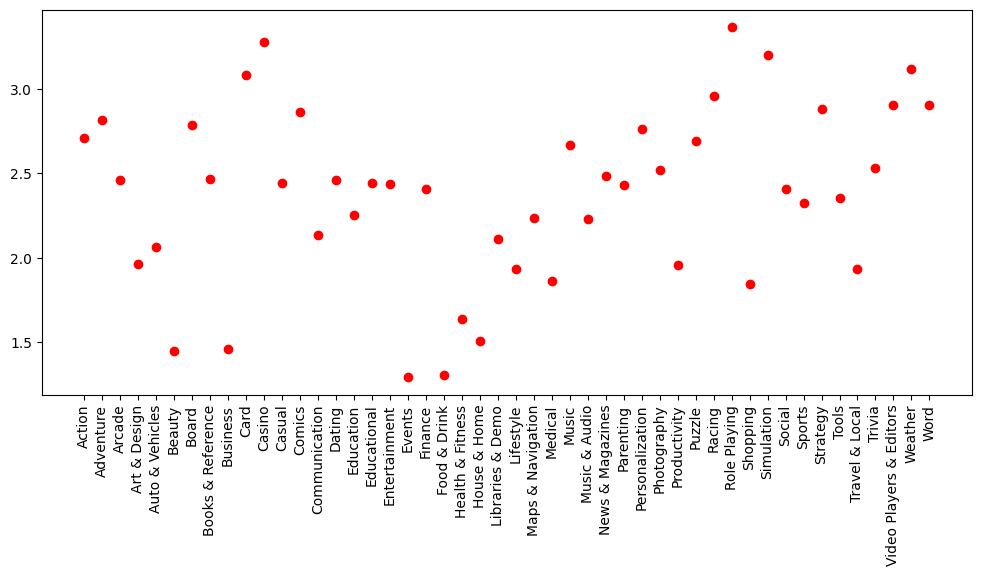

In [29]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

C:\Users\Aryansid\AppData\Local\Temp\ipykernel_5248\560835571.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'ro', color='r')


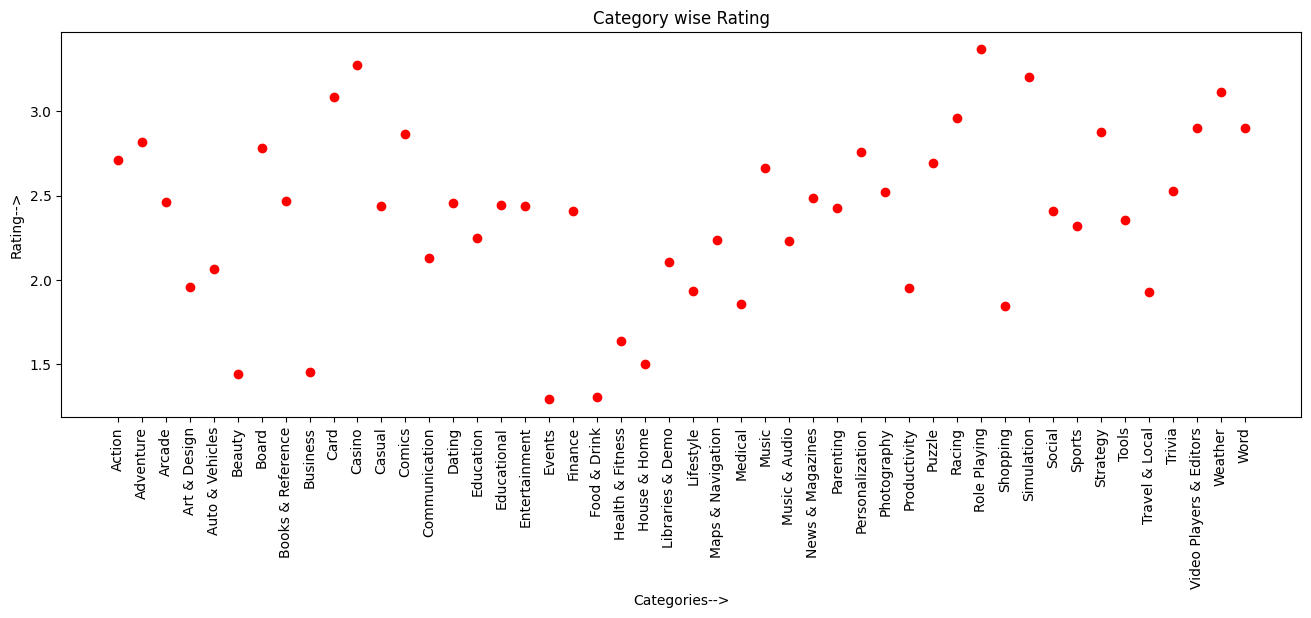

In [30]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

C:\Users\Aryansid\AppData\Local\Temp\ipykernel_5248\560835571.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'ro', color='r')


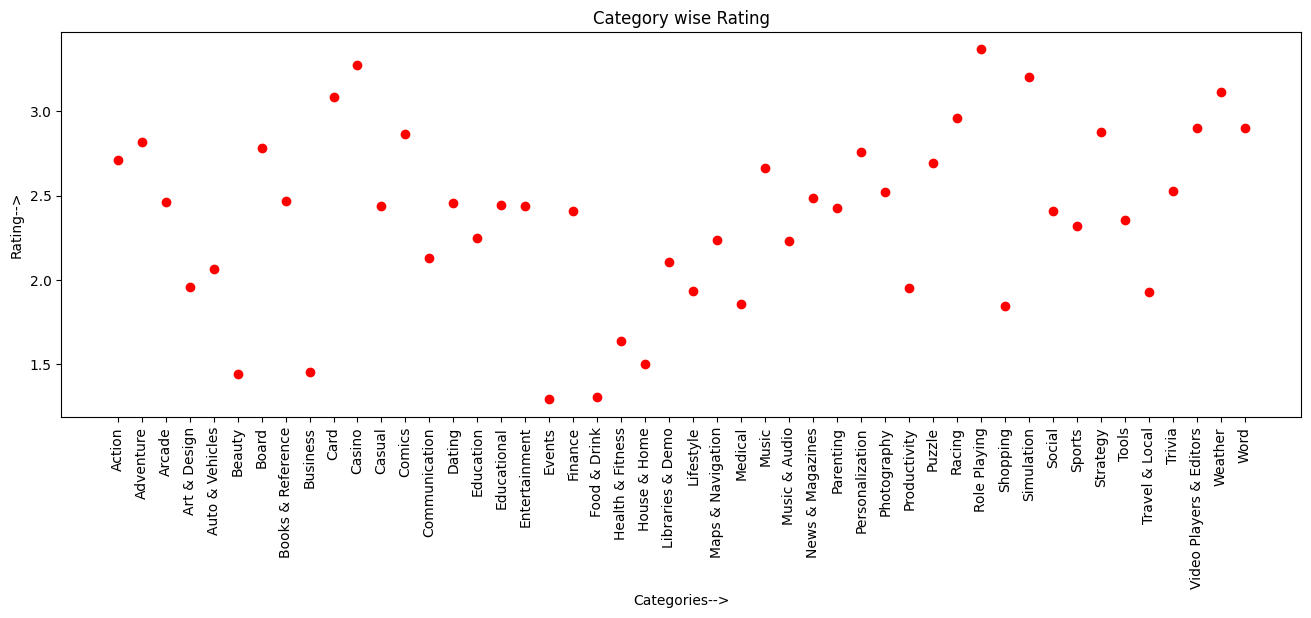

In [31]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()